In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import numpy as np
import highlight_text
from mplsoccer import Bumpy

from PIL import Image
from io import BytesIO
import requests

In [2]:
df = pd.read_excel(r"C:\Users\George\Documents\Football Analytics\Data\Norwich_Positions_notcomp.xlsx")

In [3]:
df

,Unnamed: 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 37,Week 38,Week 39,Week 40,Week 41,Week 42,Week 43,Week 44,Week 45,Week 46
0,Leeds United,1,1,1,1,1,1,1,1,1,...,1,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Leicester City,2,2,2,2,2,2,2,2,2,...,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,Ipswich Town,3,3,3,3,3,3,3,3,3,...,3,3,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,Southampton,4,4,4,4,4,4,4,4,4,...,4,4,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,West Brom,5,5,5,5,5,5,5,5,5,...,5,5,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,This Season,8,5,3,2,5,4,5,8,7,...,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Hull City,6,7,7,7,7,7,7,7,7,...,7,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
7,Coventry City,7,8,8,8,8,8,8,8,8,...,8,8,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
8,Preston,9,9,9,9,9,9,9,9,9,...,9,9,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
9,Middlesbrough,10,10,10,10,10,10,10,10,10,...,10,10,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [4]:
df = df.T

In [5]:
df.columns = df.iloc[0]
df = df.iloc[1:]

In [6]:
df.head()

Unnamed: 0,Leeds United,Leicester City,Ipswich Town,Southampton,West Brom,This Season,Hull City,Coventry City,Preston,Middlesbrough,...,Blackburn Rovers,Plymouth Argyle,Stoke City,QPR,Birmingham City,Huddersfield Town,Sheffield Wednesday,Rotherham United,hhh,Last Season
Week 1,1,2,3,4,5,8,6,7,9,10,...,17,18,19,20,21,22,23,24,6,20
Week 2,1,2,3,4,5,5,7,8,9,10,...,17,18,19,20,21,22,23,24,6,21
Week 3,1,2,3,4,5,3,7,8,9,10,...,17,18,19,20,21,22,23,24,6,24
Week 4,1,2,3,4,5,2,7,8,9,10,...,17,18,19,20,21,22,23,24,6,17
Week 5,1,2,3,4,5,5,7,8,9,10,...,17,18,19,20,21,22,23,24,6,8


In [7]:
week = ['Week '+ str(num) for num in range(1,47)]

In [8]:
bumpy = Bumpy(
    scatter_color= '#282828', line_color= '#252525',
    rotate_xticks=90, ticklabel_size=15, scatter_primary= 'D',
    show_right=True, plot_labels=True, alignment_xvalue=0.065,
    alignment_yvalue=.5
)

Text(0.5, 138.8611111111111, 'Gameweek')

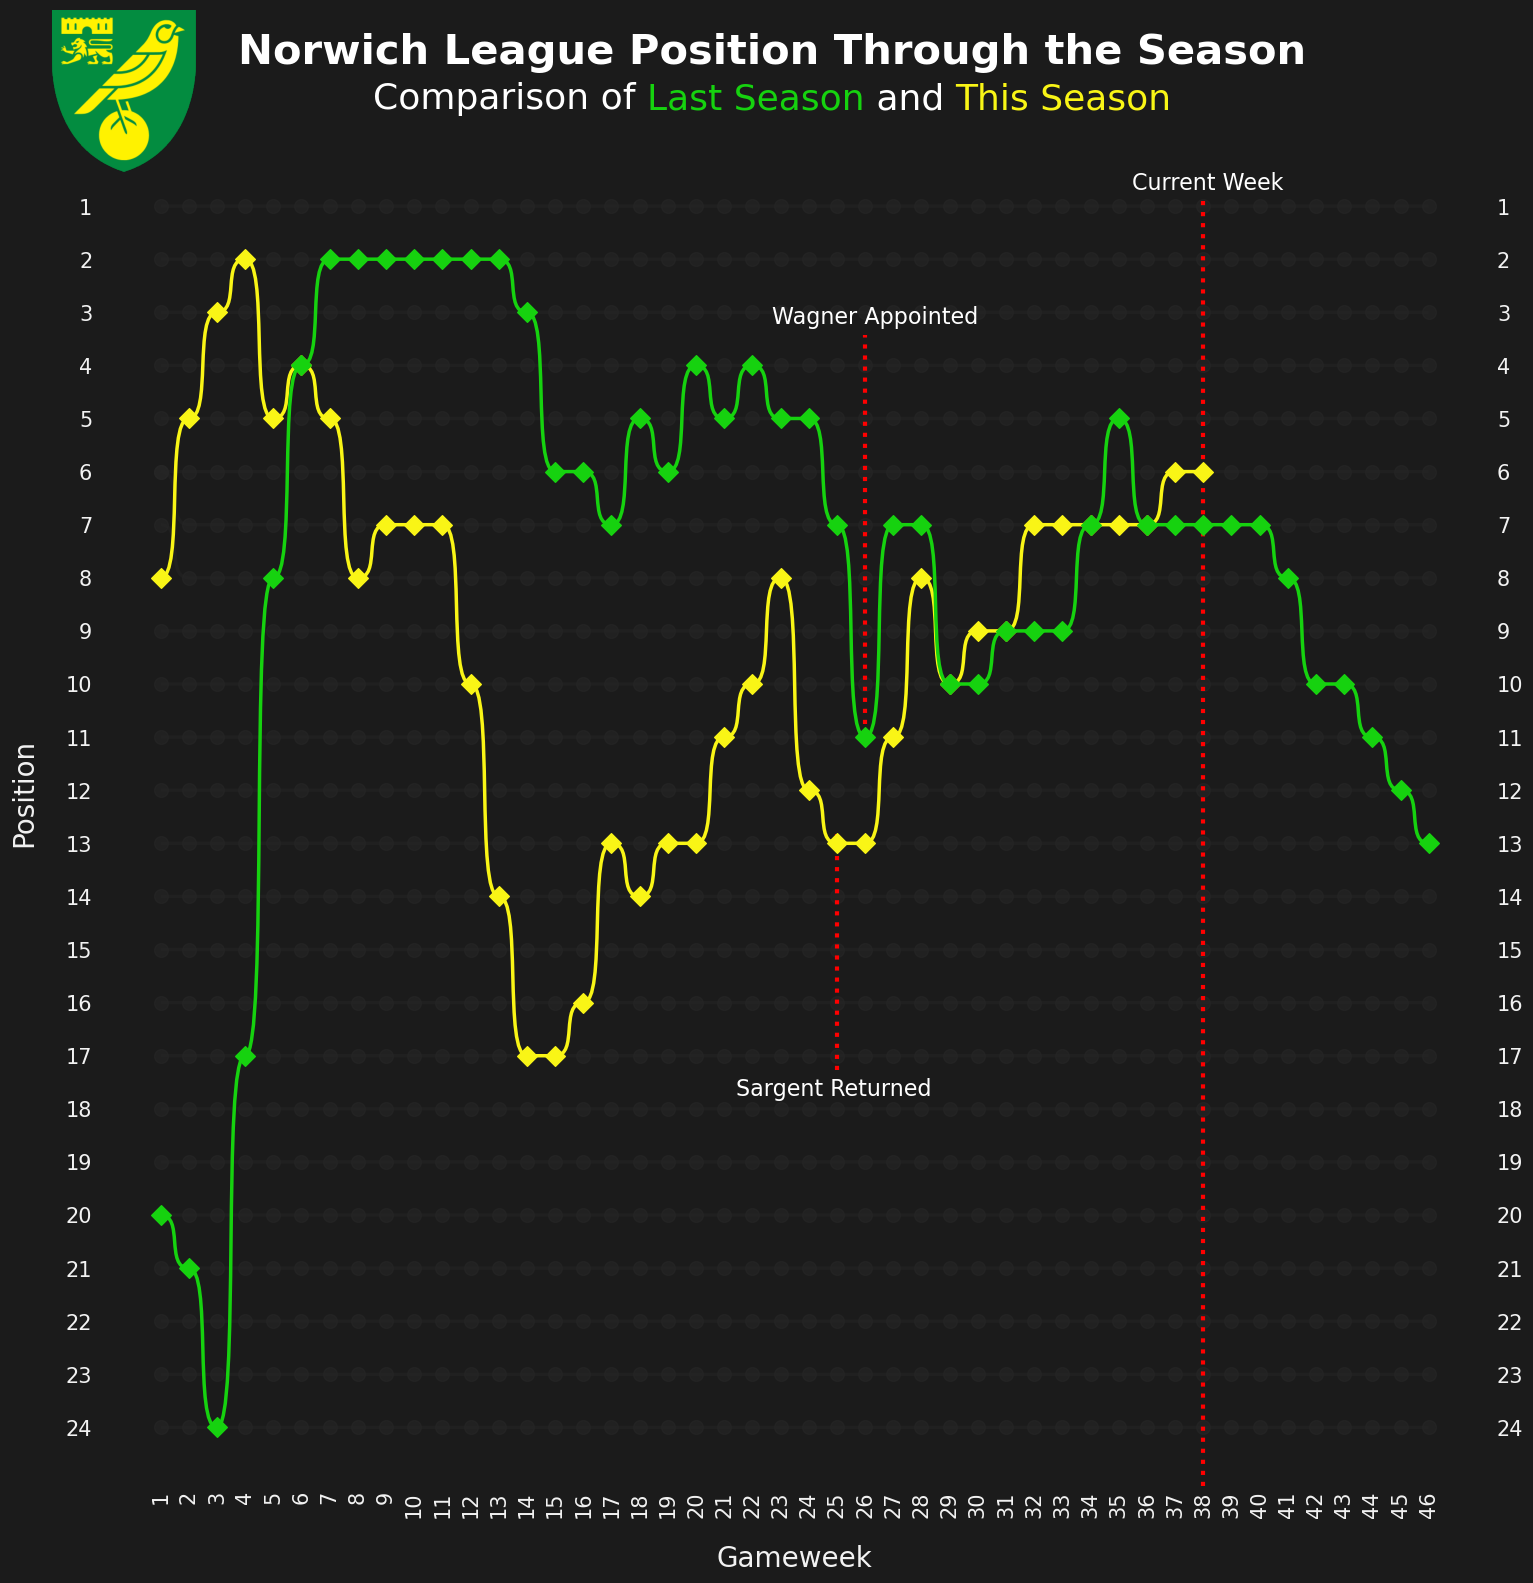

In [26]:
highlight_dict = {
    'This Season': '#F9F516',
    'Last Season': '#16D20F'
}

fig, ax = bumpy.plot(
    x_list = np.linspace(1,46,46).astype(int),
    y_list = np.linspace(1,24,24).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (18,18),
    y_label = 'Position',
    ylim = (-.1,26),
    lw = 2.5
)

fig.text(s = 'Norwich League Position Through the Season',x = .5, y = .90,
        c = 'white',size=30,weight='bold',ha='center'
       )

highlight_text.fig_text(x=.5, y= .89, 
                       s = 'Comparison of <Last Season> and <This Season>',
                       highlight_textprops = [
                           {"color":'#16D20F'},
                           {"color":'#F9F516'}  
                       ],
                        fontsize = 26,
                        color = 'white',
                        ha='center'
                       )

ax2 = fig.add_axes([.1,.82,.08,.13])
ax2.axis('off')
img = Image.open("C:/Users/George/Documents/Football Analytics/Team Logos/norwich city_logo.png")
ax2.imshow(img)
ax.axvline(x=week.index('Week 38'), color='red', linestyle='dotted', ymax=.93, linewidth = 3)
fig.text(s = 'Current Week',x = .7, y = .83, color = 'white', size = 16)
ax.axvline(x=week.index('Week 26'), color='red', linestyle='dotted', ymax=.83, ymin=.55, linewidth = 3)
fig.text(s = 'Wagner Appointed',x = .5, y = .756, color = 'white', size = 16)
ax.axvline(x=week.index('Week 25'), color='red', linestyle='dotted', ymax= .47, ymin=.3, linewidth = 3)
fig.text(s = 'Sargent Returned',x = .48, y = .327, color = 'white', size = 16)
ax.set_xlabel('Gameweek')


In [20]:
fig.savefig(
    "C:/Users/George/Documents/Football Analytics/Visuals/Norwich_Position.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches="tight"
)